# DA_A7
Ziyue Han(ZIH11)

Ruofei Lai(RUL35)

Shiqi Wang(SHW118 )

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from matplotlib.pyplot import clf 
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import math
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE

# 1 Iris

In [2]:
# Load data
iris=load_iris()
print(iris.keys())
print(iris)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.

In [3]:
iris = pd.DataFrame(data= np.c_[iris['data'],iris['target']], columns=iris['feature_names']+['target'])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
x = iris.iloc[:,range(0, 4)]
y = iris.iloc[:, 4]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [6]:
def tuningPara_crossValid(model, param_grid):
    kfold = KFold(n_splits=5, random_state=0, shuffle=True)
    grid_search = GridSearchCV(model, param_grid, cv=kfold)
    grid_search.fit(x_train, y_train)
    accuracy = grid_search.score(x_test, y_test)
    print('Best parameters: {}'.format(grid_search.best_params_))
    print('Best cross-validation score:', grid_search.best_score_)
    print('The accuracy score is:', accuracy)

## Logistic Regression: parameter tuning & cross validation

In [7]:
# tunning parameters
param_grid = {'penalty':['l1', 'l2'], 
              'C': [0.001, 0.01, 0.1, 1, 10, 100]}
LR = LogisticRegression()
tuningPara_crossValid(LR, param_grid)

Best parameters: {'C': 10, 'penalty': 'l2'}
Best cross-validation score: 0.9732142857142857
The accuracy score is: 0.9210526315789473


## Random Forest: parameter tuning & cross validation

In [8]:
# tunning parameters 
# max_feature for classification problem is sqrt(n_features)
param_grid = {'n_estimators': [2, 3, 4, 5],
              'max_depth':[2, 3, 4, 5]}
RFC = RandomForestClassifier(max_features=2, n_jobs=-1)
tuningPara_crossValid(RFC, param_grid)

Best parameters: {'max_depth': 2, 'n_estimators': 4}
Best cross-validation score: 0.9642857142857143
The accuracy score is: 0.8947368421052632


## Decision Tree: parameter tuning & cross validation

In [9]:
param_grid = {'max_depth':[1,2,3,4,5]}
DTC = DecisionTreeClassifier()
tuningPara_crossValid(DTC, param_grid)

Best parameters: {'max_depth': 3}
Best cross-validation score: 0.9732142857142857
The accuracy score is: 0.9736842105263158


We can see that the model Decision Tree with the parameters ('max_depth':3) performs better, it get the highest accuracy 0.9736842105263158. 

## Correlation Matrix & Feature selection

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.109369,0.871754,0.817954,0.782561
petal length (cm),0.871754,-0.420516,1.000000,0.962757,0.949043
petal width (cm),0.817954,-0.356544,0.962757,1.000000,0.956464
target,0.782561,-0.419446,0.949043,0.956464,1.000000


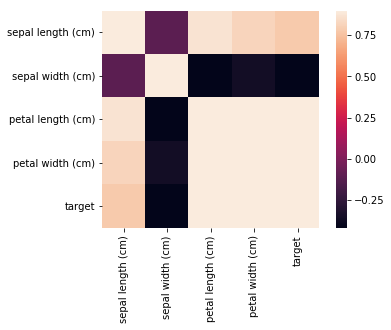

In [15]:
corrmat = iris.corr()
sns.heatmap(corrmat, vmax = 0.9, square = True)
corrmat[corrmat['target'] > 0.5]

# Logistic Regression

In [10]:
# The original dataframe
x = iris.iloc[:,range(0, 4)]
y = iris.iloc[:, 4]
validation_size = 0.20
seed = 1
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)
scoring='accuracy'
models=[]
models.append(('LR',LogisticRegression()))
results = []
names = []
print('The original result: ')
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

The original result: 
LR: 0.933333 (0.050000)


### we select the top 3 Correlation features according to correlation matrix

In [11]:
# Feature selection for LR
x = iris[['sepal length (cm)','petal length (cm)','petal width (cm)']]
y = iris.iloc[:, 4]
validation_size = 0.20
seed = 1
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)
scoring='accuracy'
models=[]
models.append(('LR',LogisticRegression()))
results = []
names = []
print('After feature selection: ')
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

After feature selection: 
LR: 0.925000 (0.069222)


In [12]:
# Feature expansion, interaction_only=True
x = iris.iloc[:,range(0, 4)]
y = iris.iloc[:, 4]
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)
validation_size = 0.20
seed = 1
models=[]
models.append(('LR',LogisticRegression()))
results = []
names = []
scoring='accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    model_inter_true = make_pipeline(PolynomialFeatures(2,interaction_only=True), model)
    cv_results = model_selection.cross_val_score(model_inter_true, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.964394 (0.043658)


In [13]:
# Feature Selection  + Feature Expension for LR
# interaction_only =  True
x = iris[['sepal length (cm)','petal length (cm)','petal width (cm)']]
y = iris.iloc[:, 4]
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)
models=[]
models.append(('LR',LogisticRegression()))
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    model_inter_true = make_pipeline(PolynomialFeatures(2,interaction_only=True), model)
    cv_results = model_selection.cross_val_score(model_inter_true, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.950000 (0.076376)


In [14]:
# Feature Selection  + Feature Expension for LR
# interaction_only =  False
models=[]
models.append(('LR',LogisticRegression()))
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    model_inter_true = make_pipeline(PolynomialFeatures(2,interaction_only=False), model)
    cv_results = model_selection.cross_val_score(model_inter_true, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.055277)


#### For Logistic Regression, feature expension can improve the accuracy, the most highest accuracy is created under the combination of feature selection and feature expansion

## Random Forest

In [15]:
x = iris.iloc[:,range(0, 4)]
y = iris.iloc[:, 4]
validation_size = 0.20
seed = 1
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)
scoring='accuracy'
models=[]
models.append(('RF',RandomForestClassifier()))
results = []
names = []
print('The original result: ')
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

The original result: 
RF: 0.908333 (0.078617)


In [16]:
# Feature selection for RF
x = iris[['sepal length (cm)','petal length (cm)','petal width (cm)']]
y = iris.iloc[:, 4]
validation_size = 0.20
seed = 1
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)
scoring='accuracy'
models=[]
models.append(('RF',RandomForestClassifier()))
results = []
names = []
print('After feature selection: ')
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

After feature selection: 
RF: 0.933333 (0.062361)


In [17]:
# Feature expansion, interaction_only=True
x = iris.iloc[:,range(0, 3)]
y = iris.iloc[:, 4]
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)
validation_size = 0.20
seed = 1
models=[]
models.append(('RF',RandomForestClassifier()))
results = []
names = []
scoring='accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    model_inter_true = make_pipeline(PolynomialFeatures(2,interaction_only=True), model)
    cv_results = model_selection.cross_val_score(model_inter_true, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RF: 0.938636 (0.054886)


In [18]:
# Feature Selection  + Feature Expension for RF
# interaction_only =  True
x = iris[['sepal length (cm)','petal length (cm)','petal width (cm)']]
y = iris.iloc[:, 4]
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)
models=[]
models.append(('RF',RandomForestClassifier()))
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    model_inter_true = make_pipeline(PolynomialFeatures(2,interaction_only=True), model)
    cv_results = model_selection.cross_val_score(model_inter_true, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RF: 0.941667 (0.065085)


In [19]:
# Feature Selection  + Feature Expension for RF
# interaction_only =  False
models=[]
models.append(('RF',RandomForestClassifier()))
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    model_inter_true = make_pipeline(PolynomialFeatures(2,interaction_only=False), model)
    cv_results = model_selection.cross_val_score(model_inter_true, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RF: 0.941667 (0.065085)


#### For Random Forest, both feature selection and feature expension can improve the accuracy. But after feature selection, we found that the accuracy is high enough, we guess that random forest maybe overfitting after feature expansion

## CART

In [20]:
x = iris.iloc[:,range(0, 4)]
y = iris.iloc[:, 4]
validation_size = 0.20
seed = 1
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)
scoring='accuracy'
models=[]
models.append(('DTC',DecisionTreeClassifier()))
results = []
names = []
print('The original result: ')
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

The original result: 
DTC: 0.933333 (0.081650)


In [21]:
# Feature selection for LR
x = iris[['sepal length (cm)','petal length (cm)','petal width (cm)']]
y = iris.iloc[:, 4]
validation_size = 0.20
seed = 1
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)
scoring='accuracy'
models=[]
models.append(('DTC',DecisionTreeClassifier()))
results = []
names = []
print('After feature selection: ')
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

After feature selection: 
DTC: 0.941667 (0.053359)


In [22]:
# Feature expansion, interaction_only=True
x = iris.iloc[:,range(0, 3)]
y = iris.iloc[:, 4]
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)
validation_size = 0.20
seed = 1
models=[]
models.append(('DTC',DecisionTreeClassifier()))
results = []
names = []
scoring='accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    model_inter_true = make_pipeline(PolynomialFeatures(2,interaction_only=True), model)
    cv_results = model_selection.cross_val_score(model_inter_true, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

DTC: 0.956818 (0.077706)


In [23]:
# Feature Selection  + Feature Expension for SVM
# interaction_only =  True
x = iris[['sepal length (cm)','petal length (cm)','petal width (cm)']]
y = iris.iloc[:, 4]
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)
models=[]
models.append(('DTC',DecisionTreeClassifier()))
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    model_inter_true = make_pipeline(PolynomialFeatures(2,interaction_only=True), model)
    cv_results = model_selection.cross_val_score(model_inter_true, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

DTC: 0.958333 (0.041667)


#### For Decision Tree, both feature selection and feature expension can improve the accuracy. And when we combine the feature selection and feature expansion together, we get the highest accuracy.

We can see under feature expansion, LogisticRegression performs better. I think the reason is that logistic regression is a little bit complex and suit for dealing with raw data. if the features get expanded, LR may be get overfitting. 

# 2 Congressional Voting Records

In [25]:
# Load Data
path = '/Users/ziyuehan/Downloads/2018Spring/Data Analytics/Assignment/7/'
cvr = pd.read_table(path + 'house-votes-84.data.txt', header = None, sep = ',')
print(cvr)

             0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16
0    republican  n  y  n  y  y  y  n  n  n  y  ?  y  y  y  n  y
1    republican  n  y  n  y  y  y  n  n  n  n  n  y  y  y  n  ?
2      democrat  ?  y  y  ?  y  y  n  n  n  n  y  n  y  y  n  n
3      democrat  n  y  y  n  ?  y  n  n  n  n  y  n  y  n  n  y
4      democrat  y  y  y  n  y  y  n  n  n  n  y  ?  y  y  y  y
5      democrat  n  y  y  n  y  y  n  n  n  n  n  n  y  y  y  y
6      democrat  n  y  n  y  y  y  n  n  n  n  n  n  ?  y  y  y
7    republican  n  y  n  y  y  y  n  n  n  n  n  n  y  y  ?  y
8    republican  n  y  n  y  y  y  n  n  n  n  n  y  y  y  n  y
9      democrat  y  y  y  n  n  n  y  y  y  n  n  n  n  n  ?  ?
10   republican  n  y  n  y  y  n  n  n  n  n  ?  ?  y  y  n  n
11   republican  n  y  n  y  y  y  n  n  n  n  y  ?  y  y  ?  ?
12     democrat  n  y  y  n  n  n  y  y  y  n  n  n  y  n  ?  ?
13     democrat  y  y  y  n  n  y  y  y  ?  y  y  ?  n  n  y  ?
14   republican  n  y  n  y  y  y  n  n 

In [31]:
cvr[0].replace('republican', 0, inplace = True)
cvr[0].replace('democrat', 1, inplace = True)
cvr.replace('n', 0, inplace = True)
cvr.replace('y', 1, inplace = True)
cvr.replace('?', 2, inplace = True)

In [32]:
y = cvr.iloc[:, 0]
x = cvr.iloc[:, range(1,17)]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [33]:
def tuningPara_crossValid(model, param_grid):
    kfold = KFold(n_splits=5, random_state=0, shuffle=True)
    grid_search = GridSearchCV(model, param_grid, cv=kfold)
    grid_search.fit(x_train, y_train)
    accuracy = grid_search.score(x_test, y_test)
    print('Best parameters: {}'.format(grid_search.best_params_))
    print('Best cross-validation score:', grid_search.best_score_)
    print('The accuracy score is:', accuracy)

In [34]:
# Logistic Regression: parameter tuning & cross validation
# tunning parameters
print('Logistic Regression')
param_grid = {'penalty':['l1', 'l2'], 
              'C': [0.001, 0.01, 0.1, 1, 10, 100]}

tuningPara_crossValid(LogisticRegression(), param_grid)

Logistic Regression
Best parameters: {'C': 0.1, 'penalty': 'l1'}
Best cross-validation score: 0.9263803680981595
The accuracy score is: 0.8990825688073395


In [99]:
# Random Forest: parameter tuning & cross validation
# tunning parameters 
# max_feature for classification problem is sqrt(n_features)
print('Random Forest')
param_grid = {'n_estimators': [2, 3, 4, 5],
              'max_depth':[2, 3, 4, 5]}

tuningPara_crossValid(RandomForestClassifier(max_features=2, n_jobs=-1), param_grid)

Random Forest
Best parameters: {'max_depth': 5, 'n_estimators': 5}
Best cross-validation score: 0.9386503067484663
The accuracy score is: 0.926605504587156


In [104]:
# Decision Tree: parameter tuning & cross validation
param_grid = {'max_depth':[1, 2, 3, 4, 5]}
print('Decision Tree')
tuningPara_crossValid(DecisionTreeClassifier(), param_grid)

Decision Tree
Best parameters: {'max_depth': 4}
Best cross-validation score: 0.9662576687116564
The accuracy score is: 0.926605504587156


,Party,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,nti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_sa
Party,1.000000,0.380395,-0.018560,0.676258,-0.795967,-0.584265,-0.358753,0.448214,0.506271,0.578097,-0.081648,0.283345,-0.536044,-0.443033,-0.538348,0.390387,0.342197
adoption_of_the_budget_resolution,0.676258,0.403787,0.039210,1.000000,-0.464820,-0.438152,-0.265103,0.473806,0.557397,0.539170,0.061886,0.233233,-0.388872,-0.302286,-0.431608,0.376696,0.378472
aid_to_nicaraguan_contras,0.506271,0.333097,0.000260,0.557397,-0.438618,-0.537219,-0.336305,0.631455,1.000000,0.604281,0.072276,0.192023,-0.311607,-0.286561,-0.349530,0.456214,0.408703
mx_missile,0.578097,0.348948,-0.087735,0.539170,-0.521291,-0.575354,-0.404171,0.569680,0.604281,1.000000,0.083258,0.081582,-0.340548,-0.337433,-0.393975,0.390068,0.325532


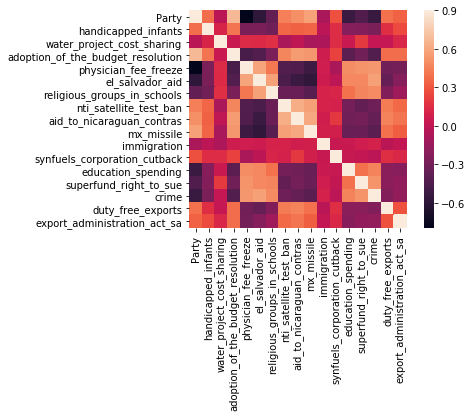

In [101]:
corrmat = cvr.corr()
sns.heatmap(corrmat, vmax = 0.9, square = True)
corrmat[corrmat['Party'] > 0.5]

In [102]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None, copy = True, whiten = False)   
pca.fit(cvr)
pca.components_ 
pca.explained_variance_ratio_  

array([0.35837449, 0.11090405, 0.07716679, 0.05870944, 0.05386458,
       0.04872877, 0.04799288, 0.03976888, 0.03650243, 0.03069248,
       0.02906423, 0.02561996, 0.02199096, 0.01976975, 0.01865009,
       0.01620162, 0.00599861])

### Based on the above decomposition analysis, we decide to select 7 features during the feature selection process because the first 7 features account for the majority components of these feature leading to the class.

## SVM

In [12]:
# The original dataframe
y = cvr.iloc[:, 0]
x = cvr.iloc[:, range(1,17)]
validation_size = 0.20
seed = 1
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)
scoring='accuracy'
models=[]
models.append(('SVM',LogisticRegression()))
results = []
names = []
print('The original result: ')
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

The original result: 
SVM: 0.939496 (0.044543)


In [9]:
# Feature selection for SVM
y = cvr.iloc[:, 0]
x = cvr.iloc[:, range(1,17)]
estimator = SVC(kernel="linear")
selector = RFE(estimator, 7, step=1)
selector = selector.fit(x, y.values.ravel())
print(selector.support_)

[False False  True  True False False False False  True  True  True  True
 False  True False False]


In [10]:
cvr.describe()

,Party,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,nti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_sa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.613793,0.485057,0.668966,0.632184,0.457471,0.556322,0.675862,0.613793,0.625287,0.577011,0.528736,0.441379,0.535632,0.595402,0.648276,0.528736,1.096552
std,0.487440,0.552858,0.665702,0.532686,0.547224,0.562602,0.519874,0.549648,0.551332,0.588230,0.531043,0.586435,0.626227,0.597211,0.553968,0.615452,0.610856
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [11]:
# Feature Selection for SVM
x = x[['water_project_cost_sharing','adoption_of_the_budget_resolution','aid_to_nicaraguan_contras','mx_missile','immigration','synfuels_corporation_cutback']]
y = cvr.iloc[:, 0]
validation_size = 0.20
seed = 1
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)
scoring='accuracy'
models=[]
models.append(('SVM',SVC()))
results = []
names = []
print('After feature selection: ')
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

After feature selection: 
SVM: 0.899412 (0.037017)


In [161]:
# Feature expansion, interaction_only=True
y = cvr.iloc[:, 0]
x = cvr.iloc[:, range(1,17)]
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)
validation_size = 0.20
seed = 1
models=[]
models.append(('SVM',SVC()))
results = []
names = []
scoring='accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    model_inter_true = make_pipeline(PolynomialFeatures(2,interaction_only=True), model)
    cv_results = model_selection.cross_val_score(model_inter_true, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

SVM: 0.920455 (0.047545)


In [162]:
# Feature Selection  + Feature Expension for SVM
# interaction_only =  True
y = cvr.iloc[:, 0]
x = cvr.iloc[:, range(1,17)]
x = x[[3, 4, 9, 10, 11, 12, 14]]
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)
models=[]
models.append(('SVM',SVC()))
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    model_inter_true = make_pipeline(PolynomialFeatures(2,interaction_only=True), model)
    cv_results = model_selection.cross_val_score(model_inter_true, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

SVM: 0.951008 (0.038979)


In [163]:
# Feature Selection  + Feature Expension for SVM
# interaction_only =  False
models=[]
models.append(('SVM',SVC()))
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    model_inter_true = make_pipeline(PolynomialFeatures(2,interaction_only=False), model)
    cv_results = model_selection.cross_val_score(model_inter_true, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

SVM: 0.945294 (0.035403)


### For SVM, Feature selection can imporve the accuracy, but feature expension fails.

## Random Forest

In [169]:
y = cvr.iloc[:, 0]
x = cvr.iloc[:, range(1,17)]
validation_size = 0.20
seed = 1
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)
scoring='accuracy'
models=[]
models.append(('RF',RandomForestClassifier()))
results = []
names = []
print('The original result: ')
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

The original result: 
RF: 0.962605 (0.029147)


In [167]:
# Feature selection for RF
y = cvr.iloc[:, 0]
x = cvr.iloc[:, range(1,17)]
estimator = RandomForestClassifier()
selector = RFE(estimator, 7, step=1)
selector = selector.fit(x, y.values.ravel())
print(selector.support_)

[False False  True  True  True False False False False False  True  True
  True  True False False]


In [170]:
# Feature Selection
x = x[[3, 4, 5, 11, 12, 13, 14]]
y = cvr.iloc[:, 0]
validation_size = 0.20
seed = 1
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)
scoring='accuracy'
models=[]
models.append(('RF',RandomForestClassifier()))
results = []
names = []
print('After feature selection')
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

After feature selection
RF: 0.956975 (0.032023)


In [171]:
# Feature expension
y = cvr.iloc[:, 0]
x = cvr.iloc[:, range(1,17)]
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)
validation_size = 0.20
seed = 1
models=[]
models.append(('RF',RandomForestClassifier()))
results = []
names = []
scoring='accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    model_inter_true = make_pipeline(PolynomialFeatures(2,interaction_only=True), model)
    cv_results = model_selection.cross_val_score(model_inter_true, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RF: 0.953977 (0.031525)


In [172]:
# Feature expension + feature selection
# interaction_only =  True
y = cvr.iloc[:, 0]
x = cvr.iloc[:, range(1,17)]
x = x[[3, 4, 5, 11, 12, 13, 14]]
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)
models=[]
models.append(('RF',RandomForestClassifier()))
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    model_inter_true = make_pipeline(PolynomialFeatures(2,interaction_only=True), model)
    cv_results = model_selection.cross_val_score(model_inter_true, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RF: 0.959748 (0.029540)


In [173]:
# interaction_only = False
models=[]
models.append(('RF',RandomForestClassifier()))
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    model_inter_true = make_pipeline(PolynomialFeatures(2,interaction_only=False), model)
    cv_results = model_selection.cross_val_score(model_inter_true, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RF: 0.956891 (0.037002)


### For random forest, both feature selection and feature expansion fail to improve the accuracy.

## CART

In [174]:
y = cvr.iloc[:, 0]
x = cvr.iloc[:, range(1,17)]
validation_size = 0.20
seed = 1
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)
scoring='accuracy'
models=[]
models.append(('CART',DecisionTreeClassifier()))
results = []
names = []
print('The original result: ')
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

The original result: 
CART: 0.951092 (0.036473)


In [175]:
# Feature selection
estimator = DecisionTreeClassifier()
selector = RFE(estimator, 7, step=1)
selector = selector.fit(x, y.values.ravel())
print(selector.support_)

[False False  True  True False False  True False  True False  True  True
 False False False  True]


In [176]:
# Feature Selection
y = cvr.iloc[:, 0]
x = cvr.iloc[:, range(1,17)]
x = x[[3, 4, 7, 9, 11, 12, 16]]
y = cvr.iloc[:, 0]
validation_size = 0.20
seed = 1
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)
scoring='accuracy'
models=[]
models.append(('CART',DecisionTreeClassifier()))
results = []
names = []
print('After feature selection')
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

After feature selection
CART: 0.956891 (0.026393)


In [177]:
# Feature expension
y = cvr.iloc[:, 0]
x = cvr.iloc[:, range(1,17)]
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)
validation_size = 0.20
seed = 1
models=[]
models.append(('CART',DecisionTreeClassifier()))
results = []
names = []
scoring='accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    model_inter_true = make_pipeline(PolynomialFeatures(2,interaction_only=True), model)
    cv_results = model_selection.cross_val_score(model_inter_true, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

CART: 0.932386 (0.043388)


In [178]:
# Feature expension + feature selection
# interaction_only =  True
y = cvr.iloc[:, 0]
x = cvr.iloc[:, range(1,17)]
x = x[[3, 4, 7, 9, 11, 12, 16]]
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)
models=[]
models.append(('CART',DecisionTreeClassifier()))
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    model_inter_true = make_pipeline(PolynomialFeatures(2,interaction_only=True), model)
    cv_results = model_selection.cross_val_score(model_inter_true, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

CART: 0.951092 (0.036473)


In [179]:
# interaction_only =  False
y = cvr.iloc[:, 0]
x = cvr.iloc[:, range(1,17)]
x = x[[3, 4, 7, 9, 11, 12, 16]]
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)
models=[]
models.append(('CART',DecisionTreeClassifier()))
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    model_inter_true = make_pipeline(PolynomialFeatures(2,interaction_only=False), model)
    cv_results = model_selection.cross_val_score(model_inter_true, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

CART: 0.959664 (0.034601)


### For CART, feature selection can better the accuracy, while feature expansion cannot.

# Summary

For iris dataset, the best model out of three is LogisticRegression(0.96667 std(0.055277)) with feature selection and feature expansion.

For Congressional Voting dataset, the best accuracy is given by Random forest : 0.962605 std(0.029147) without feature selection and feature expansion

## Effect of Feature Selection and Feature Expansion

When features are very few, feature selection may decrease the accuracy even if the features are highly correlated with a selected feature. Feature selection helps to find the key features when features are too many.
Feature expansion is suitable for simpler models (e.g., decision tree); the expanded features provide more information for the simpler model to generate better accuracy. 
Expanded features provides more information to train the simpler models, resulting in higher accuracy. Feature expansion is not suitable for complex models (e.g., LR); since expanded features are not raw, they may cause overfitting to the complex models.